Exploratory Analysis on Sales Data.. by AL

In [1]:
# import data analysis packages for visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import file and create data frame
df = pd.read_csv("C:\\Users\\Zen\\Documents\\PracticeData\\FilteredSalesData.csv")

 What are the data types  and how many records are there?

In [3]:
# Shown info for data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order_Date      199 non-null    object
 1   OrderId         199 non-null    object
 2   Item_ID         199 non-null    object
 3   Item            199 non-null    object
 4   Qty_Sold        199 non-null    int64 
 5   Actual Price    199 non-null    int64 
 6   Discount Price  199 non-null    int64 
 7   Discount        199 non-null    object
 8   Date_Shipd      199 non-null    object
 9   Time_Shipd      199 non-null    object
 10  Loc_ID          199 non-null    object
 11  City            199 non-null    object
 12  Country         199 non-null    object
 13  Region          171 non-null    object
 14  Sales_ID        199 non-null    object
 15  SalesPerson     199 non-null    object
dtypes: int64(3), object(13)
memory usage: 25.0+ KB


What entries are missing from the region column?

In [4]:
# limited data output
df.loc[df['Region'].isna()].head(5)

,Order_Date,OrderId,Item_ID,Item,Qty_Sold,Actual Price,Discount Price,Discount,Date_Shipd,Time_Shipd,Loc_ID,City,Country,Region,Sales_ID,SalesPerson
1,12/15/2013,I-1164,I-04,Toaster,43,50,40,20.00%,1/26/2014,2:09:38 PM,L-26,Kansas City,USA,NaN,S-29,Robert Arnold
3,1/15/2014,I-1019,I-03,Ceiling fan,53,150,150,0.00%,3/11/2014,12:30:47 AM,L-02,Toronto,Canada,NaN,S-18,Robin Hall
4,1/16/2014,I-1133,I-11,Vacuum Cleaner,94,250,175,30.00%,2/8/2014,1:38:30 PM,L-30,Los Angeles,USA,NaN,S-116,Chandrakant Atkins
10,3/14/2014,I-1199,I-11,Vacuum Cleaner,88,250,193,22.80%,5/1/2014,7:26:38 AM,L-31,New York,USA,NaN,S-158,Robert Arnold
21,6/9/2014,I-1088,I-03,Ceiling fan,90,150,150,0.00%,7/15/2014,9:02:10 AM,L-26,Kansas City,USA,NaN,S-82,Robin Hall


In [5]:
# Convert date and time columns for analysis, re run info cell to verify checks
df['Date_Shipd']= pd.to_datetime(df['Date_Shipd'])
df['Order_Date']= pd.to_datetime(df['Order_Date'])
df['Time_Shipd']= pd.to_timedelta(df['Time_Shipd'])

What does the data frame look like?

In [6]:
# show top 5 rows of data frame to see what data looks like
df.head()

,Order_Date,OrderId,Item_ID,Item,Qty_Sold,Actual Price,Discount Price,Discount,Date_Shipd,Time_Shipd,Loc_ID,City,Country,Region,Sales_ID,SalesPerson
0,2013-11-11,I-1092,I-07,Washing Machine,34,800,712,11.00%,2014-01-03,0 days 07:17:48,L-39,Buenos Aires,Argentina,LATAM,S-86,Abdul Heywood
1,2013-12-15,I-1164,I-04,Toaster,43,50,40,20.00%,2014-01-26,0 days 02:09:38,L-26,Kansas City,USA,NaN,S-29,Robert Arnold
2,2013-12-26,I-1184,I-04,Toaster,87,50,44,12.00%,2014-01-02,0 days 10:50:08,L-32,Warsaw,Poland,EMEA,S-149,Anthony Connolly
3,2014-01-15,I-1019,I-03,Ceiling fan,53,150,150,0.00%,2014-03-11,0 days 12:30:47,L-02,Toronto,Canada,NaN,S-18,Robin Hall
4,2014-01-16,I-1133,I-11,Vacuum Cleaner,94,250,175,30.00%,2014-02-08,0 days 01:38:30,L-30,Los Angeles,USA,NaN,S-116,Chandrakant Atkins


Who is the Best Salesperson?

In [7]:
# Create list of salesperon and how many items they sold and total value
df[['SalesPerson','Qty_Sold','Actual Price']].groupby(by=['SalesPerson'],sort=True).sum('count').sort_values(by='Qty_Sold')

,Qty_Sold,Actual Price
SalesPerson,,
Nicholas Holloway,36,800
Ronald Butler,917,6160
Anthony Connolly,943,9140
Abdul Heywood,1050,6260
Alen Dinan,1066,6900
Robin Hall,1130,6470
Chandrakant Atkins,1131,7370
Gary Shaw,1153,3670
Philip Dewar,1229,10140


What country are the sales people from?

In [8]:
# temporaraly set index to get grouping of sales names
df[['Country','SalesPerson']].set_index('Country').groupby(by=['Country','SalesPerson']).count()

Empty DataFrame
Columns: []
Index: [(Argentina, Abdul Heywood), (Argentina, Alen Dinan), (Argentina, Philip Dewar), (Australia, Alen Dinan), (Australia, Anthony Connolly), (Australia, Chandrakant Atkins), (Austria, Chandrakant Atkins), (Austria, Philip Dewar), (Brazil, Alen Dinan), (Brazil, Anthony Connolly), (Brazil, Gary Shaw), (Brazil, Philip Dewar), (Canada, Alen Dinan), (Canada, Anthony Connolly), (Canada, Philip Dewar), (Canada, Robin Hall), (Chile, Alen Dinan), (China, Alen Dinan), (China, Anthony Connolly), (China, Chandrakant Atkins), (China, Gary Shaw), (China, Philip Dewar), (China, Robert Arnold), (China, Ronald Butler), (Colombia, Gary Shaw), (Colombia, Robin Hall), (Czech Republic, Anthony Connolly), (Czech Republic, Gary Shaw), (Czech Republic, Philip Dewar), (Czech Republic, Robert Arnold), (Czech Republic, Robin Hall), (Egypt, Abdul Heywood), (Egypt, Chandrakant Atkins), (Egypt, Gary Shaw), (Egypt, Robert Arnold), (France, Philip Dewar), (France, Robert Arnold), (Germany, Abdul Heywood), (Germany, Anthony Connolly), (Germany, Gary Shaw), (Germany, Philip Dewar), (Germany, Ronald Butler), (Greece, Anthony Connolly), (Greece, Chandrakant Atkins), (Greece, Philip Dewar), (India, Abdul Heywood), (India, Alen Dinan), (India, Chandrakant Atkins), (India, Gary Shaw), (India, Philip Dewar), (India, Ronald Butler), (Ireland, Abdul Heywood), (Ireland, Anthony Connolly), (Israel, Abdul Heywood), (Israel, Alen Dinan), (Israel, Anthony Connolly), (Israel, Robert Arnold), (Israel, Robin Hall), (Israel, Ronald Butler), (Italy, Abdul Heywood), (Italy, Gary Shaw), (Italy, Robert Arnold), (Italy, Robin Hall), (Italy, Ronald Butler), (Japan, Abdul Heywood), (Japan, Alen Dinan), (Japan, Anthony Connolly), (Japan, Chandrakant Atkins), (Japan, Gary Shaw), (Japan, Robert Arnold), (Malaysia, Gary Shaw), (Malaysia, Philip Dewar), (Malaysia, Robin Hall), (Mexico, Abdul Heywood), (Mexico, Alen Dinan), (Mexico, Philip Dewar), (Mexico, Robert Arnold), (Mexico, Robin Hall), (Mexico, Ronald Butler), (Netherlands, Abdul Heywood), (Netherlands, Alen Dinan), (Netherlands, Chandrakant Atkins), (Peru, Abdul Heywood), (Peru, Chandrakant Atkins), (Peru, Gary Shaw), (Peru, Robert Arnold), (Peru, Robin Hall), (Poland, Anthony Connolly), (Poland, Philip Dewar), (Poland, Robert Arnold), (Poland, Robin Hall), (Romania, Philip Dewar), (Romania, Ronald Butler), (Russia, Abdul Heywood), (Russia, Anthony Connolly), (Russia, Chandrakant Atkins), (Russia, Robert Arnold), (Russia, Robin Hall), (Russia, Ronald Butler), (Saudi Arabia, Alen Dinan), ...]

[141 rows x 0 columns]

What item sold the most units?

In [9]:
# List of item qty that sold
df[['Item','Qty_Sold']].groupby(by=['Item'],sort=True).sum().sort_values(by='Qty_Sold')

,Qty_Sold
Item,
Dishwasher,478
Washing Machine,690
Coffee grinder,713
Ceiling fan,726
Air conditioner,727
Blender,795
Toaster,798
Refrigerator,817
Vacuum Cleaner,829


What item brought in the higest gross profits?

In [10]:
# List of item qty that sold
df[['Item','Actual Price']].groupby(by=['Item'],sort=True).sum().sort_values(by='Actual Price',ascending=False)

,Actual Price
Item,
Refrigerator,17000
Washing Machine,12000
Air conditioner,9800
Oven,9500
Dishwasher,4000
Vacuum Cleaner,3750
Ceiling fan,2250
Microwave,1600
Coffee grinder,1260


What country are we shipping the most units to?

In [11]:
df[['Country','Qty_Sold']].groupby(by='Country').sum().sort_values(by='Qty_Sold',ascending=False).head(n=5)

,Qty_Sold
Country,
USA,1321
China,739
Israel,643
India,505
Peru,490


<Axes: xlabel='Country'>

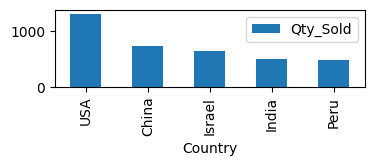

In [12]:
df[['Country','Qty_Sold']].groupby(by='Country').sum().sort_values(by='Qty_Sold',ascending=False).head(n=5).plot(kind='bar',figsize=(4,1))

What country is placing the most orders?

In [13]:
df[['Country','OrderId']].groupby(by=['Country']).count().sort_values(by='OrderId',ascending=False,).head(n=5)

,OrderId
Country,
USA,23
China,13
Israel,10
India,10
Russia,8


<Axes: ylabel='Country'>

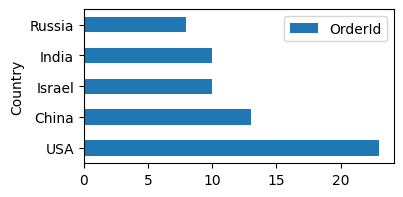

In [14]:
df[['Country','OrderId']].groupby(by=['Country']).count().sort_values(by='OrderId',ascending=False,).head(n=5).plot(kind='barh',figsize=(4,2))

What was the amount of discounts given year over year?

In [15]:
# Adding a total discount column to df and seeing yearly values
df['total_discount']= df['Actual Price'] - df['Discount Price']
df[['Order_Date','Qty_Sold','Actual Price','Discount Price','total_discount']].resample(on='Order_Date',rule='YE').sum()

,Qty_Sold,Actual Price,Discount Price,total_discount
Order_Date,,,,
2013-12-31,164,900,796,104
2014-12-31,2127,15180,12979,2201
2015-12-31,2088,9480,7639,1841
2016-12-31,1590,10450,9548,902
2017-12-31,2171,16370,14022,2348
2018-12-31,1985,11120,9918,1202


What are the country discount totals over the years?

In [16]:
df[['Country','Order_Date','total_discount']].set_index(['Country']).groupby(by='Country').resample(on='Order_Date',rule='YE').sum()

total_discount
Country   Order_Date                
Argentina 2013-12-31              88
          2014-12-31              40
          2015-12-31               0
          2016-12-31               2
          2017-12-31             430
...                              ...
Vietnam   2014-12-31               8
          2015-12-31               2
          2016-12-31               0
          2017-12-31               2
          2018-12-31               4

[137 rows x 1 columns]

What are the stats on the total discounts given?

In [17]:
# df discount stats
df['total_discount'].describe()

count    199.00000
mean      43.20603
std       90.93378
min        0.00000
25%        3.00000
50%        8.00000
75%       27.00000
max      500.00000
Name: total_discount, dtype: float64

What orders were above the mean discount price and who gave the most discounts?

In [18]:
df.loc[(df['total_discount']> 43)].groupby(by='SalesPerson').sum(numeric_only=True).sort_values(by='total_discount',ascending=False)

,Qty_Sold,Actual Price,Discount Price,total_discount
SalesPerson,,,,
Philip Dewar,364,7100,4782,2318
Alen Dinan,276,4500,3328,1172
Chandrakant Atkins,295,5250,4107,1143
Robert Arnold,297,3550,2838,712
Anthony Connolly,167,4600,3913,687
Abdul Heywood,190,2600,2060,540
Gary Shaw,99,800,512,288
Nicholas Holloway,36,800,584,216
Ronald Butler,68,1000,910,90
